<a href="https://colab.research.google.com/github/MrCamilo5/ML-aprender-3/blob/master/LSTM3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import  MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
datos=pd.read_csv('TRM.csv', decimal=',',parse_dates=['Fecha (dd/mm/aaaa)'],index_col=['Fecha (dd/mm/aaaa)'], usecols=[1,2])


In [3]:
datos.head()

,TRM
Fecha (dd/mm/aaaa),
2020-01-22,3347.91
2020-01-21,3320.77
2020-01-20,3320.77
2020-01-19,3320.77
2020-01-18,3320.77


In [0]:
train, test = datos[:-12],datos[-12:]

In [0]:
#SKLEARN 
scaler= MinMaxScaler()
scaler.fit(train)
train=scaler.transform(train)
test=scaler.transform(test)

In [0]:
niput=12
nfeat=1
generator=TimeseriesGenerator(train, train,length=niput, batch_size=6)

model=Sequential()
model.add(LSTM(200, activation='relu', input_shape=(niput,nfeat)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.fit_generator(generator, epochs=180)

In [0]:
prde=[]
batch=train[-niput:].reshape((1, niput,nfeat))
for _ in range(niput):
  prde.append(model.predict(batch)[0])
  batch=np.append(batch[:,1:,:],[[prde[_]]],axis=1)

In [0]:
dfpre=pd.DataFrame(scaler.inverse_transform(prde),index=datos[-niput:].index, columns=['Pre'])

dftest=pd.concat([datos,dfpre],axis=1)

In [0]:
dftest.head()

,TRM,Pre
Fecha (dd/mm/aaaa),,
2010-01-22,1967.08,1994.021024
2010-01-23,1981.96,1992.306986
2010-01-24,1981.96,1990.554457
2010-01-25,1981.96,1988.760451
2010-01-26,1961.97,1986.877304


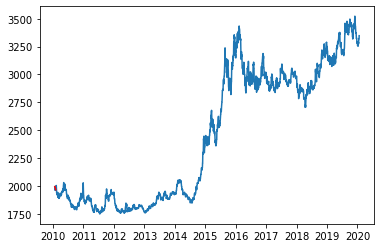

In [0]:
plt.plot(dftest['TRM'])
plt.plot(dftest['Pre'], color='r')